# Web Scraping Project

In this project we will be scraping information from IMDB website. IMDb is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online. Information we will extract is about Most Popular Movies from <a href='https://www.imdb.com/chart/moviemeter/'>this link</a>. All the information we extract will be put inside a pandas DataFrame and if possible, i will make a simple data analysis and visualization.

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = 'https://editorial.rottentomatoes.com/guide/popular-movies/'
req = requests.get(link)

In [3]:
soup = BeautifulSoup(req.text)
soup

<!DOCTYPE html>
<html class="hitim" lang="en-US">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<!-- OneTrust Cookies Consent Notice start for rottentomatoes.com -->
<script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-WEHwEli88wqOiQd913F1utFZiwisa8XhCkbjLnbKEpFa/WbFcPKeGg7h4fdsv0Z/" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
</script>
<script type="text/javascript">
        function OptanonWrapper() { }
    </script>
<!-- OneTrust Cookies Consent Notice end for rottentomatoes.com -->
<!-- OneTrust IAB US Privacy (USP) -->
<script ccpa-opt-out-geo="US" ccpa-opt-out-ids="dummy" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
</script>
<!-- OneTrust IAB US Priva

In [4]:
title = soup.select('.article_movie_title  a')[0]
title

<a href="https://www.rottentomatoes.com/m/shazam_fury_of_the_gods">Shazam! Fury of the Gods</a>

---

Now, let's get more information about each of the movie. We can see that there are route to each movie title in `href`. We can get more information by going to each of the movie links

In [5]:
newl = title['href']
req1 = requests.get(newl)

In [6]:
soup1 = BeautifulSoup(req.text)

So, the HTTP method returns an error code of 403. The 403 Forbidden error means that your server is working, but you no longer have permission to view all or some of your site for some reason. One of the reason of 403 error may be in our **headers specifically User-Agent**, so lets modify it.

In [7]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.44'}
# headers = {'User-Agent': ''}
req1 = requests.get(newl, headers=headers)

In [8]:
soup1 = BeautifulSoup(req1.text)
soup1

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-WEHwEli88wqOiQd913F1utFZiwisa8XhCkbjLnbKEpFa/WbFcPKeGg7h4fdsv0Z/" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
</script>
<script type="text/javascript">
        function OptanonWrapper() { }
        </script>
<script ccpa-opt-out-geo="US" ccpa-opt-out-ids="dummy" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
</script>
<script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single"></script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Ty

We fix the problem by changing our **User Agent** in our header file. Now, lets extract information from this page. frEfSL

In [9]:
tomatometer = soup1.select('score-board')[0]['tomatometerscore']
audience = soup1.select('score-board')[0]['audiencescore']
info = soup1.select('.media-body .panel-body.content_body drawer-more p')[0].contents[0].replace('\n', '').lstrip()

In [10]:
audience

'87'

Next lets make a function that can extract an array of information from `bs4.element.ResultSet`

In [11]:
def extract_array(results):
    cons = []
    
    for x in results:
        cons.append(x.contents[0])
    
    return cons

In [12]:
cast = extract_array(soup1.select('.cast-and-crew-item .metadata a p'))

Now that we're done researching what information we want, now lets extract information from all top movies.

In [13]:
# HTTP get to the top movies page
link = 'https://editorial.rottentomatoes.com/guide/popular-movies/'
req = requests.get(link)
soup = BeautifulSoup(req.text)

# get the top movies in the page
data = []
title = soup.select('.article_movie_title  a')

# Extract information for each top movie
for x in title:
    rows = []
    # First thing is movie title
    rows.append(x.contents[0])
    
    # Next, go to each movie page
    newl = x['href']
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.44'}
    req = requests.get(newl, headers=headers)
    soup = BeautifulSoup(req.text)
    
    # Extract information about movie
    info = soup.select('.media-body .panel-body.content_body drawer-more p')[0].contents[0].replace('\n', '').strip()
    rows.append(info)
    
    # Tomatometer
    tomatometer = int(soup.select('score-board')[0]['tomatometerscore'])
    rows.append(tomatometer)
    
    # Audience Score
    audience = int(soup.select('score-board')[0]['audiencescore'])
    rows.append(audience)
    
    # Array of casts
    casts = extract_array(soup.select('.cast-and-crew-item .metadata a p'))
    rows.append(casts)
    
    # Put rows array to data array
    data.append(rows)

In [14]:
df = pd.DataFrame(data, columns=['Title', 'Info', 'tomatometer', 'audience score', 'casts'])

In [15]:
df.head()

,Title,Info,tomatometer,audience score,casts
0,Shazam! Fury of the Gods,"From New Line Cinema comes ""Shazam! Fury of th...",51,87,"[Zachary Levi, Helen Mirren, Lucy Liu, Asher A..."
1,Everything Everywhere All at Once,"Directed by Daniel Kwan and Daniel Scheinert, ...",94,86,"[Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Ja..."
2,Scream VI,"Following the latest Ghostface killings, the f...",77,91,"[Melissa Barrera, Jenna Ortega, Courteney Cox,..."
3,The Whale,A reclusive English teacher suffering from sev...,64,91,"[Brendan Fraser, Sadie Sink, Hong Chau, Ty Sim..."
4,65,After a catastrophic crash on an unknown plane...,34,64,"[Adam Driver, Ariana Greenblatt, Scott Beck, B..."


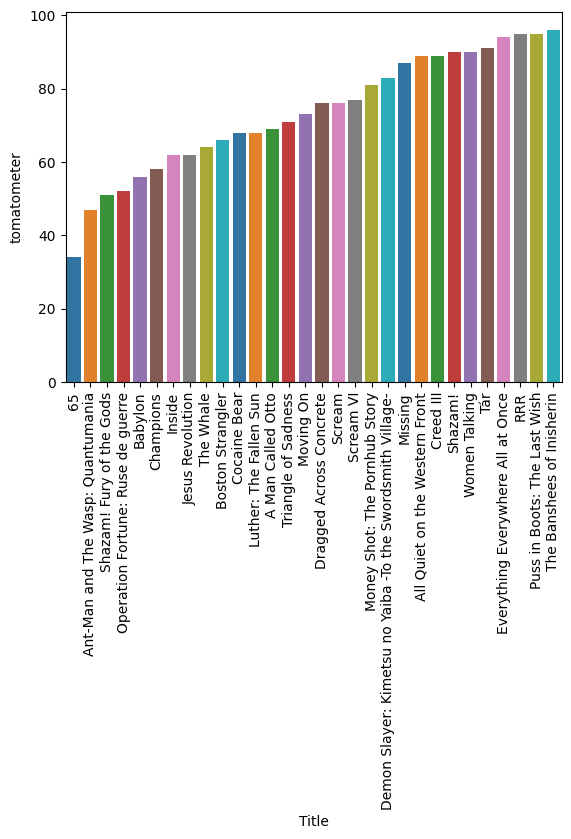

In [23]:
sns.barplot(data=df.sort_values(by='tomatometer'), x='Title', y='tomatometer', palette='tab10')
plt.xticks(rotation=90);

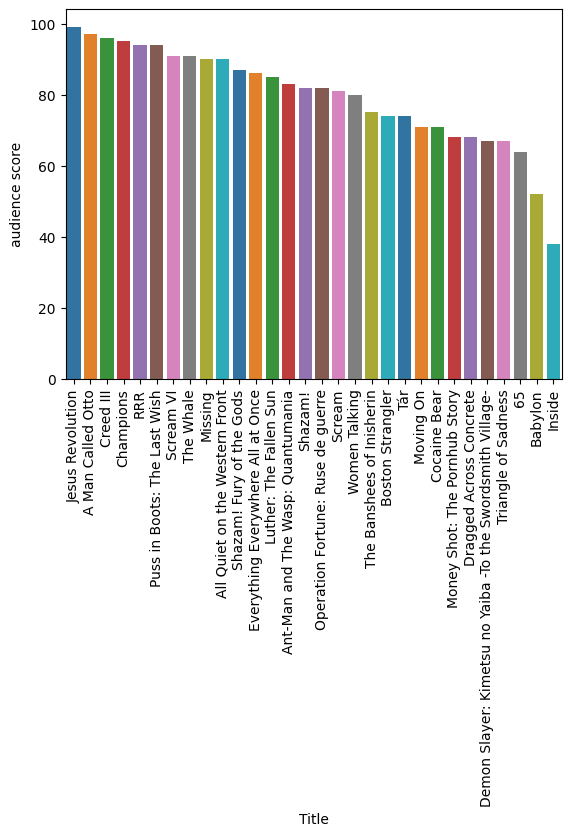

In [25]:
sns.barplot(data=df.sort_values(by='audience score', ascending=False), x='Title', y='audience score', palette='tab10')
plt.xticks(rotation=90);